# Mengembangkan Strategi Customer Retention pada Pusat Kebugaran Model Fitness

󠀰Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik yang mereka himpun.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳

󠀰Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau customer churn.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀥󠀳󠀰 Bagaimana ya cara mengetahui apakah pelanggan sudah berhenti menggunakan layanan kita?󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀦󠀳󠀰

Untuk mengurangi tingkat churn, Model Fitness menerapkan digitalisasi terhadap sejumlah profil pelanggan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 Nah, tugasmu adalah menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (customer retention).󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀦󠀳

Untuk itu, kamu harus:

- Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
- Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya
- Menganalisis faktor yang paling memengaruhi churn
- Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
    - Mengidentifikasi kelompok yang ditargetkan
    - Merekomendasikan langkah-langkah untuk mengurangi churn
    - Mendeskripsikan pola lain yang kamu temui terkait interaksi pelanggan

Tujuan : Menganalisis profil para pelanggan dan mengembangkan strategi retensi pelanggan (customer retention) terhadap pelanggan churn.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀦󠀳

## Deskripsi data

Dataframe `data_gym` memuat:


   1. `Churn` — Churn aktual untuk bulan terkait
   
   
   2. Data pengguna untuk bulan sebelumnya
      - `gender` — Jenis Kelamin
      - `Phone` — Apakah pengguna memberikan nomor telepon mereka
      - `Age` — Umur pelanggan
      - `Lifetime` — Waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran
      - `Near_Location` — Apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
      - `Promo_friends` — Apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
      - `Partner` — Apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
      
      
   3. Data dari log kunjungan dan pembelian, serta data terkait status keanggotaan saat ini
      - `Contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
      - `Month_to_end_contract` — Sisa bulan sebelum kontrak berakhir
      - `Group_visits` — Apakah pengguna mengambil bagian dalam sesi kelompok
      - `Avg_class_frequency_total` — Frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan
      - `Avg_class_frequency_current_month` — Frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan
      - `Avg_additional_charges_total` —  Jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

## Inisialisasi data

Import Libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Memuat dataset gym_churn_us.csv

In [22]:
data_gym = pd.read_csv('/datasets/gym_churn_us.csv')

## Mengenal data

Membaca informasi data untuk mengidentifikasi data abnormal

In [23]:
data_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [24]:
data_gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Total terdapat 4000 baris dan 14 kolom.

In [25]:
data_gym.shape

(4000, 14)

Tidak dtemukannya nilai yang duplikasi maupun nilai yang hilang pada dataset

In [26]:
data_gym.duplicated().sum()

0

In [27]:
report_null = data_gym.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / data_gym.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
gender,0,0.0
Near_Location,0,0.0
Partner,0,0.0
Promo_friends,0,0.0
Phone,0,0.0
Contract_period,0,0.0
Group_visits,0,0.0
Age,0,0.0
Avg_additional_charges_total,0,0.0
Month_to_end_contract,0,0.0


Merubah nama-nama kolom menjadi huruf kecil semua

In [28]:
data_gym.columns = [i.lower() for i in list(data_gym)]

## Analisis Data

Melihat sekilas persebaran data secara statistik melalui describe()

In [29]:
data_gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Melihat nilai rata-ratanya untuk setiap fitur terhadap churn

In [30]:
data_gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


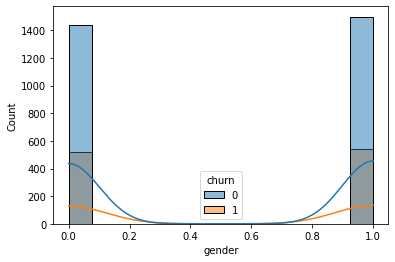

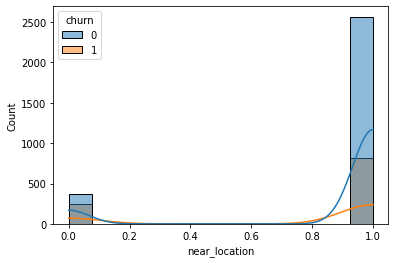

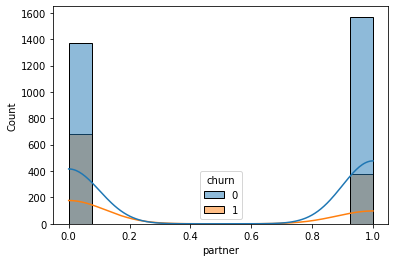

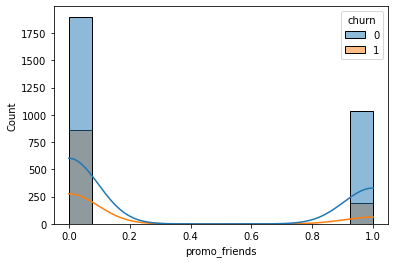

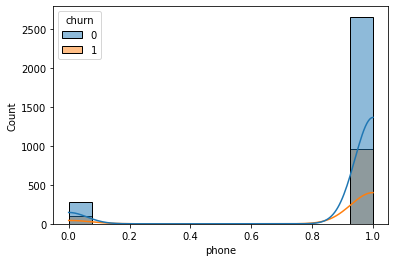

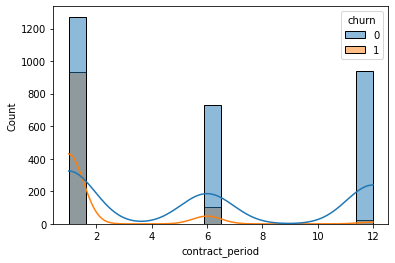

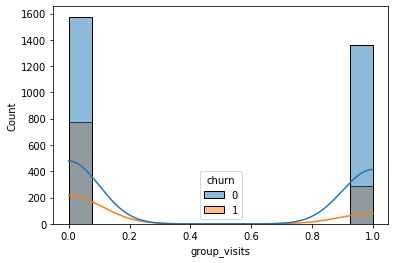

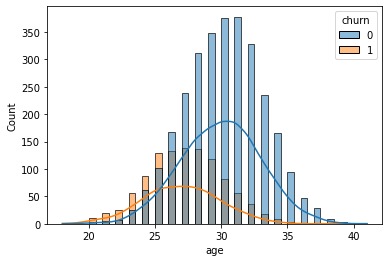

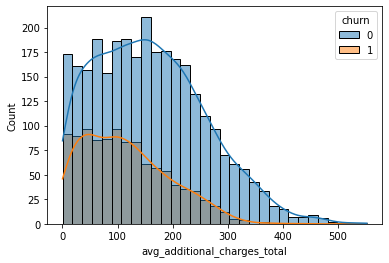

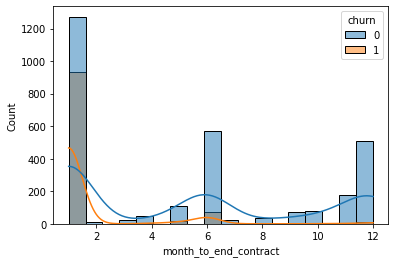

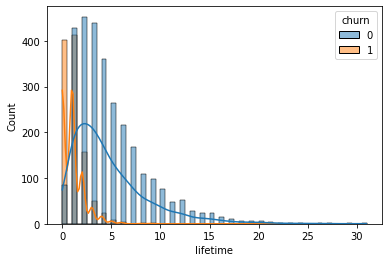

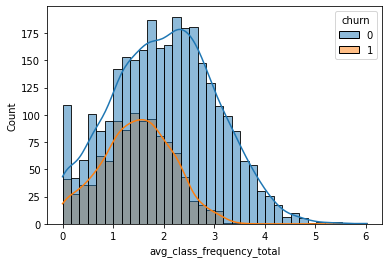

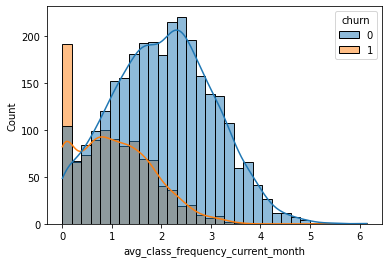

In [31]:
for col in data_gym.drop('churn', axis=1).columns:
    sns.histplot(data=data_gym, x=col, hue='churn', kde=True)
    plt.show()

Grafik distribusi setiap fitur terhadap churn:
- Ada beberapa fitur yang retensi pengunjungnya cukup tinggi untuk churn, seperti contract_period untuk bulan-bulan awal (0-2).
- Fitur Age menunjukkan tingkat churn walaupun sedikit untuk kisaran umur 20-25.
- month_to_end_contract juga sedikit menunjukkan tingkat churn pada bulan awal (1).
- Tingkat churn paling tinggi ada pada fitur lifetime pada bulan-bulan awal (0-1), ternyata pengunjung lama tingkat retensinya cukup tinggi.
- Fitur-fitur yang rentan terhadap churn ada pada fitur seperti contract_period, age, month_to_end_contract, avg_class_frequency_current_month, dan lifetime. Perlu kita buktikan lebih jauh seberapa besar tingkat retensi tersebut?

Melihat korelasi untuk setiap kolom

In [32]:
data_corr = data_gym.corr()
data_corr['churn']

gender                               0.000708
near_location                       -0.128098
partner                             -0.157986
promo_friends                       -0.162233
phone                               -0.001177
contract_period                     -0.389984
group_visits                        -0.175325
age                                 -0.404735
avg_additional_charges_total        -0.198697
month_to_end_contract               -0.381393
lifetime                            -0.438220
avg_class_frequency_total           -0.249715
avg_class_frequency_current_month   -0.412348
churn                                1.000000
Name: churn, dtype: float64

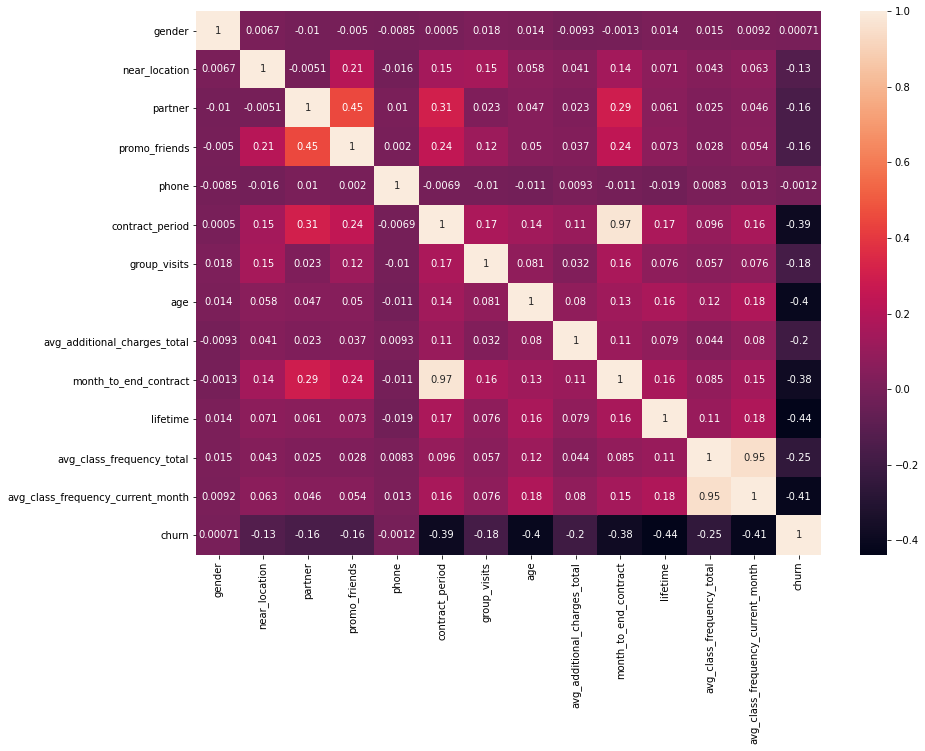

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(data_corr, annot=True)
plt.show()

Heatmap korelasi fitur-fitur dalam dataset:
- Fitur yang memiliki hubungan erat dengan churn paling tinggi yaitu fitur lifetime walau hanya 0.44 yang terbilang rendah.
- Fitur lain yang memiliki korelasi yaitu avg_class_frequency_current_month, age, contract period, dan month_to_end_contract.
- Sedangkan untuk yang tidak memiliki korelasi dengan churn adalah gender, dan phone.

## Membangun model

Kita masuk tahap modeling, pertama kita buat fungsi untuk menampilkan hasil model yang akan kita bandingkan nantinya untuk mencari model yang memberikan hasil terbaik. Evaluasi model yang digunakan yaitu accuracy, precision, dan recall.

In [34]:
def print_all_metrics(y_true, y_pred, title = 'Metrik klasifikasi'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Selanjutnya pada tahap modeling kita akan membagi datanya menjadi training dan test set menggunakan fungsi train_test_split. Pada fungsi kita akan mengontrol proporsi datanya dengan membagi data 80/20. Serta random_state kita atur ke-0 guna menghindari pembagian data secara acak.

Lalu kita latih model pada train set dengan dua metode, menggunakan LogisticRegression dan RandomForestClassifier.

In [35]:
X = data_gym.drop('churn', axis=1)
y = data_gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
print_all_metrics(y_test, lr_predictions , title='Metrik untuk regresi logistik:')

rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
print_all_metrics(y_test, rf_predictions, title = 'Metrik untuk random forest:')

Metrik untuk regresi logistik:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Metrik untuk random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Metrik untuk regresi logistik terlihat lebih tinggi dengan random forest walaupun hanya sedikit. Akan tetapi ini membuktikan metrik regresi logistik lebih baik. Tingkat accuracy menunjukkan angka yang sama, hanya pada tingkat presisi dan recal yang berbeda.

## Membuat Klaster Pengguna

Pada tahan ini kita akan menganalisis tingkat kepentingan fitur-fitur pada dataset.

Langkah awal kita akan standardisasi terhadap data menggunakan StandardScaler kemudian kita latih datanya. Gunakan fungsi linkage() untuk membuat matriks jarak berdasarkan matriks fitur yang telah distandardisasi dan buat grafik menggunakan dendrogram.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀠󠀳󠀰 

In [36]:
sc = StandardScaler()
gym_sc = sc.fit_transform(data_gym)

linked = linkage(gym_sc, method = 'ward')

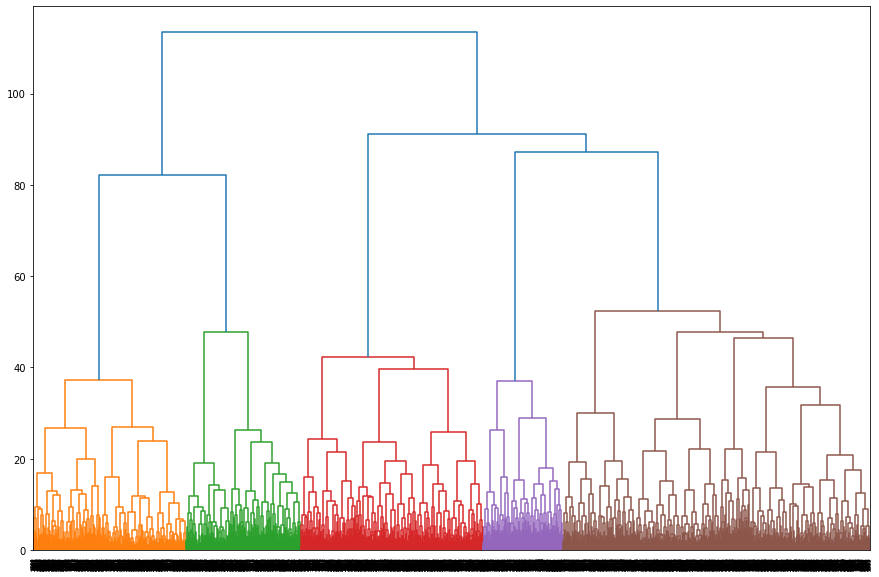

In [37]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.show()

Dendrogram:
- Jumlah kelompok optimal yang disarankan 5 berkorelasi dengan lima warna berbeda pada grafik.󠀲󠀡󠀠󠀦󠀨󠀦󠀦󠀢󠀳

Langkah selanjutnya kita Latih model pengklasteran dengan algoritma K-means dan memprediksikan klaster pelanggannya. Kita gunakan pembagian klasternya sesuai temuan di awal yaitu 5 klaster.

In [38]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(gym_sc)
data_gym['cluster_km'] = labels

data_gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.470303,0.998788,0.431515,0.296970,0.895758,2.840000,0.419394,29.992727,150.475261,2.631515,4.781818,1.177186,1.172204,0.001212
1,0.512695,0.946289,0.767578,0.553711,0.899414,11.343750,0.559570,29.895508,164.280415,10.404297,4.700195,2.013187,2.008106,0.016602
2,0.552221,0.950780,0.358944,0.249700,0.913565,2.828331,0.466987,30.124850,162.760434,2.594238,4.770708,2.965431,2.973914,0.003601
3,0.498084,0.000000,0.467433,0.074713,0.913793,2.160920,0.206897,28.421456,132.099922,2.036398,2.674330,1.599838,1.401074,0.469349
4,0.512563,1.000000,0.329146,0.219849,0.899497,1.610553,0.292714,26.947236,114.163411,1.560302,0.968593,1.479996,1.050512,0.998744


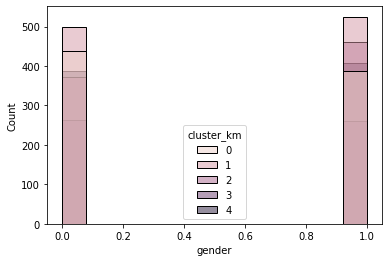

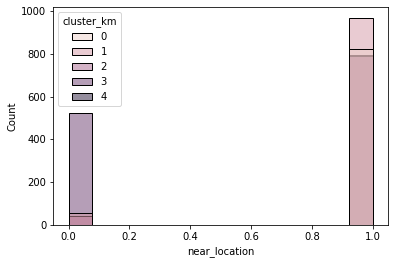

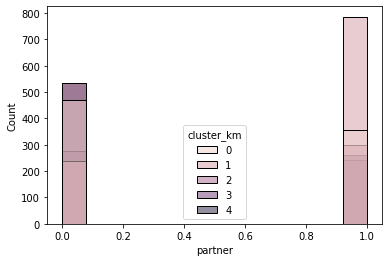

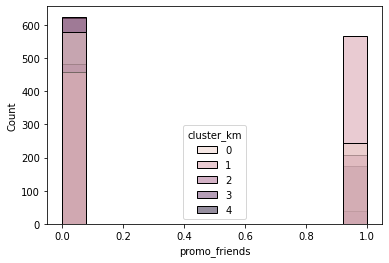

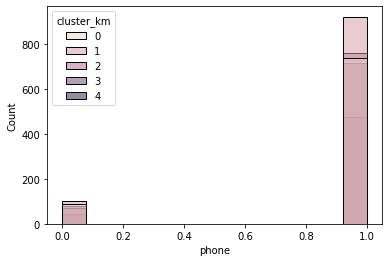

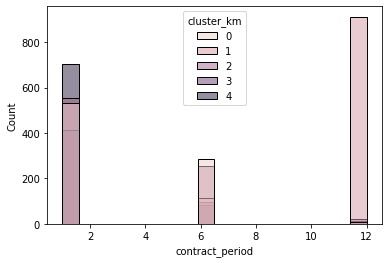

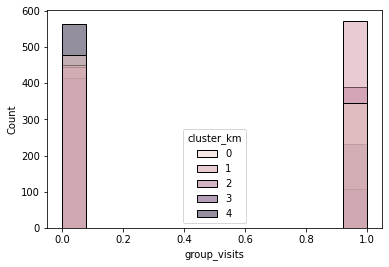

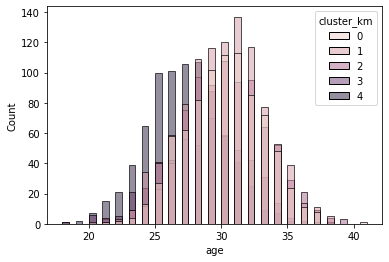

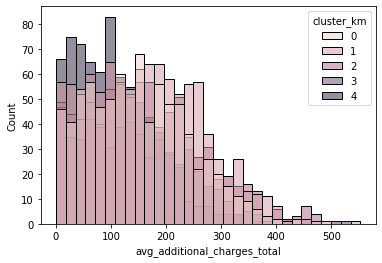

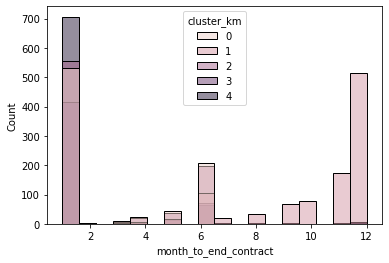

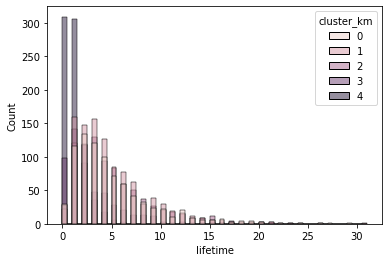

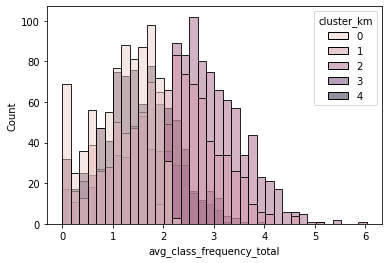

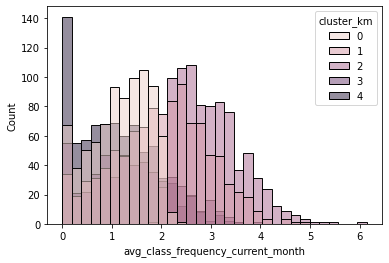

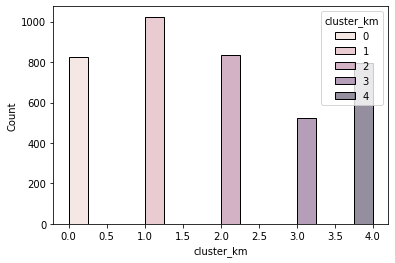

In [39]:
for column in data_gym.drop('churn', axis=1).columns:
    sns.histplot(data=data_gym, x=column, hue='cluster_km')
    plt.show()

Distribusi klaster pada setiap fitur data:
- Setiap klaster menunjukkan hasil yang relatif.
- Berdasarkan distribusi awal pada tahap analisis data
    1. lifetime, klaster 5 yang paling banyak distribusinya.
    2. age, klaster 5 di awal persebarannya paling banyak, lalu kalster 2 yang memiliki puncak distribusi.
    3. contract_period, klaster 2 dan 5 yang memiliki persebaran paling banyak.
    4. month_to_end_contract, klaster 5 lebih dominan.
    5. avg_class_frequency_current_month, klaster 5 lagi yang berada di puncak distribusi.

In [40]:
data_gym.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.001212
1    0.016602
2    0.003601
3    0.469349
4    0.998744
Name: churn, dtype: float64

Terlihat pengelompokan pada setiap klaster untuk tingkat churn di pimpim oleh klaster ke-5 dengan total rata-rata 0.998. lalu selanjutnya pada klaster 4 dengan tingkat churn di rata-rata 0.469.

## Kesimpulan Umum

Merumuskan kesimpulan dan rekomendasi sederhana untuk bekerja dengan pelanggan, berdasarkan hasil temuan:
   1. Fitur-fitur yang rentan terhadap churn ada pada fitur seperti contract_period, age, month_to_end_contract, avg_class_frequency_current_month, dan lifetime. Dengan fitur lifetime yang beresiko cukup tinggi untuk churn.
   2. Berdasarkan Korelasinya fitur lifetime yang memiliki hubungan erat dengan tingkat churn dengan nilai 0.44. Sedangkan untuk yang tidak memiliki korelasi dengan churn adalah gender, dan phone.
   3. Metrik regresi logistik membuktikan bahwa metrik ini lebih baik dari random forest. Tingkat accuracy yang menunjukkan angka 0.92, pada tingkat presisi 0.85 dan recal 0.83.
   4. Pada grafik distribusi ternyata klaster 5 yang paling banyak di temukan dari tiap fitur yang cenderung untuk churn. Bisa dipastikan dengan melihat hasil rata-rata setiap klaster untuk tingkat churn di pimpim oleh klaster ke-5 dengan total rata-rata 0.998. lalu selanjutnya pada klaster 4 dengan tingkat churn di rata-rata 0.469.
   
Maka dapat disimpulkan fitur-fitur seperti contract_period, age, month_to_end_contract, avg_class_frequency_current_month, dan lifetime yang memiliki tingkat churn paling tinggi dan berkolerasi dengan tingkat retensi untuk pelanggan. Strategi yang direkomendasikan untuk meminimalisir terjadinya churn kita perlu menimbang loyalitas pengguna dari klaster 5 yang memiliki tingkat churn paling tinggi, salah satu fitur yang bisa kita targetkan pertama kali seperti lifetime dari pengguna-pengguna awal join Fitness hingga saat ini guna menanggulangi tingkat retensinya. Jadi, bisa disimpulkan bahwa model kita kemungkinan besar mampu menangani fitur-fitur dengan baik dan merepresentasikan kenyataan yang sebenarnya.󠀲󠀡󠀠󠀦󠀩󠀧󠀧󠀩󠀳